<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>

<h1 align="center"><font size="5">Supervised Machine Learning: Regression - Final Assignment</font></h1>


## Instructions:

In this Assignment, you will demonstrate the data regression skills you have learned by completing this course. You are expected to leverage a wide variety of tools, but also this report should focus on present findings, insights, and next steps. You may include some visuals from your code output, but this report is intended as a summary of your findings, not as a code review. 

The grading will center around 5 main points:

1. Does the report include a section describing the data?
2. Does the report include a paragraph detailing the main objective(s) of this analysis? 
3. Does the report include a section with variations of linear regression models and specifies which one is the model that best suits the main objective(s) of this analysis.
4. Does the report include a clear and well-presented section with key findings related to the main objective(s) of the analysis?
5. Does the report highlight possible flaws in the model and a plan of action to revisit this analysis with additional data or different predictive modeling techniques? 




## Import the required libraries


The following required modules are pre-installed in the Skills Network Labs environment. However if you run this notebook commands in a different Jupyter environment (e.g. Watson Studio or Ananconda) you will need to install these libraries by removing the `#` sign before `!mamba` in the code cell below.


In [ ]:
# All Libraries required for this lab are listed below. The libraries pre-installed on Skills Network Labs are commented.
#!pip install  pandas==1.3.4 numpy==1.21.4 seaborn==0.9.0 matplotlib==3.5.0 scikit-learn==0.20.1
# Note: If your environment doesn't support "!mamba install", use "!pip install"

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.stats import boxcox
from scipy.special import inv_boxcox
from scipy.stats.mstats import normaltest
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import (StandardScaler, PolynomialFeatures)
from sklearn.metrics import (r2_score,mean_squared_error)

import warnings
warnings.filterwarnings('ignore')

## Importing the Dataset


Before you begin, you will need to choose a data set that you feel passionate about. You can brainstorm with your peers about great public data sets using the discussion board in this module.


Read your chosen dataset into pandas dataframe:


In [2]:
data = pd.read_csv('XAUUSD_historical_data.csv')
data.head()

,Date,Open,High,Low,Close,Change(Pips),Change(%)
0,7/31/2024 0:00,2409.74,2450.56,2404.22,2445.84,3610,1.48
1,7/30/2024 0:00,2380.88,2412.22,2376.30,2409.62,2874,1.19
2,7/29/2024 0:00,2397.17,2402.24,2369.86,2381.06,-1611,-0.68
3,7/28/2024 0:00,2388.75,2402.17,2387.50,2396.45,770,0.32
4,7/26/2024 0:00,2363.99,2390.21,2356.14,2386.60,2261,0.95


In [3]:
# Checking the size of the data set
data.shape

(731, 7)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          731 non-null    object 
 1   Open          731 non-null    float64
 2   High          731 non-null    float64
 3   Low           731 non-null    float64
 4   Close         731 non-null    float64
 5   Change(Pips)  731 non-null    int64  
 6   Change(%)     731 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 37.2+ KB


#### Data Cleansing and exploration

In [5]:
# Checking for missing values
missing_values = pd.DataFrame(data.isnull().sum())
missing_values

,0
Date,0
Open,0
High,0
Low,0
Close,0
Change(Pips),0
Change(%),0


In [6]:
# Checking for duplicates
print('Duplicates:',data.duplicated().sum())

Duplicates: 0


#### Features Engineering

In [7]:
data['Date'] = pd.to_datetime(data['Date'])
data['Day'] = data['Date'].dt.day
data['Month']= data['Date'].dt.month

#### Statistics of the data

In [8]:
# Statistical analysis
data.describe()

,Date,Open,High,Low,Close,Change(Pips),Change(%),Day,Month
count,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,2023-03-28 00:57:07.633379072,1954.620014,1967.304501,1942.490492,1955.421040,80.102599,0.034542,15.752394,6.270862
min,2021-11-03 00:00:00,1627.270000,1640.760000,1615.040000,1626.890000,-8619.000000,-4.240000,1.000000,1.000000
25%,2022-07-16 12:00:00,1815.745000,1827.875000,1808.375000,1816.810000,-869.000000,-0.435000,8.000000,3.000000
50%,2023-03-29 00:00:00,1924.740000,1934.970000,1915.340000,1924.760000,75.000000,0.040000,16.000000,6.000000
75%,2023-12-11 12:00:00,2021.635000,2035.795000,2011.575000,2022.655000,1013.500000,0.505000,23.000000,9.000000
max,2024-07-31 00:00:00,2468.260000,2483.610000,2451.560000,2468.200000,6612.000000,3.330000,31.000000,12.000000
std,NaN,195.944345,197.502543,194.810591,196.602229,1716.044062,0.866241,8.790732,3.473258


In [9]:
data[['Open','High','Low','Close','Change(Pips)','Change(%)']].skew()

Open            0.888716
High            0.902089
Low             0.879531
Close           0.888307
Change(Pips)   -0.208605
Change(%)      -0.167986
dtype: float64

<Figure size 1000x600 with 0 Axes>

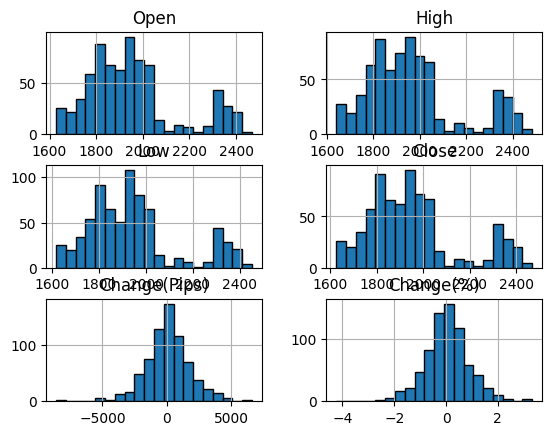

In [10]:
plt.figure(figsize=(10,6))
data[['Open','High','Low','Close','Change(Pips)','Change(%)']].hist(bins=20, edgecolor='black')
plt.show()

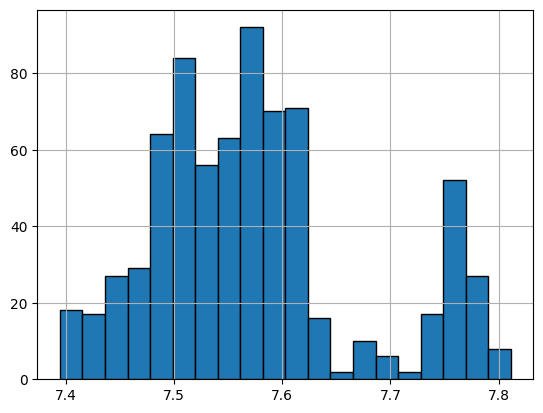

NormaltestResult(statistic=49.01378838974086, pvalue=2.2740032580433815e-11)
Skewness = 0.6886318826135572


In [11]:
# Carrying out normally Transformation on the target variable
Daily_Close = data['Close']
daily_close = np.log(Daily_Close)
daily_close.hist(bins=20, edgecolor='black')
plt.show()
print(normaltest(daily_close))
print('Skewness =',daily_close.skew())

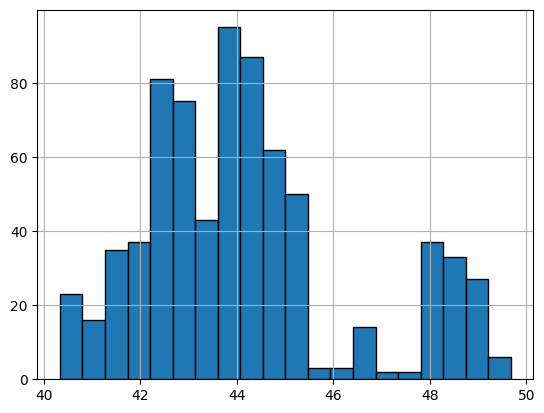

NormaltestResult(statistic=61.192386018152604, pvalue=5.1551607115447446e-14)
Skewness = 0.7901163452982821


In [12]:
# Carrying out normally Transformation on the target variable
daily_close1 = np.sqrt(Daily_Close)
daily_close1.hist(bins=20, edgecolor='black')
plt.show()
print(normaltest(daily_close1))
print('Skewness =',daily_close1.skew())

NormaltestResult(statistic=4.720238357713843, pvalue=0.09440897097255843)
Skewness = 0.6886318826135572


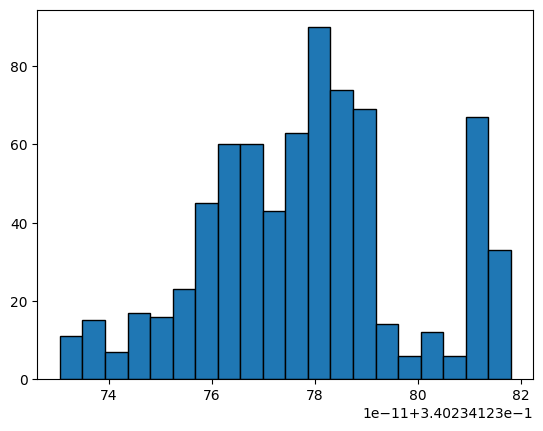

In [13]:
# Carrying out normally Transformation on the target variable
bc_daily_close = boxcox(Daily_Close)
daily_close2 = bc_daily_close[0]
lam = bc_daily_close[1]
plt.hist(daily_close2, bins=20,edgecolor='black');
print (normaltest(daily_close2))
print('Skewness =',daily_close.skew())

#### Features Selection

In [14]:
# Checking for linearity with the target variable
corr = data.corr()['Close']
corr

Date            0.783190
Open            0.996183
High            0.998370
Low             0.998418
Close           1.000000
Change(Pips)    0.081916
Change(%)       0.075103
Day             0.015490
Month          -0.275706
Name: Close, dtype: float64

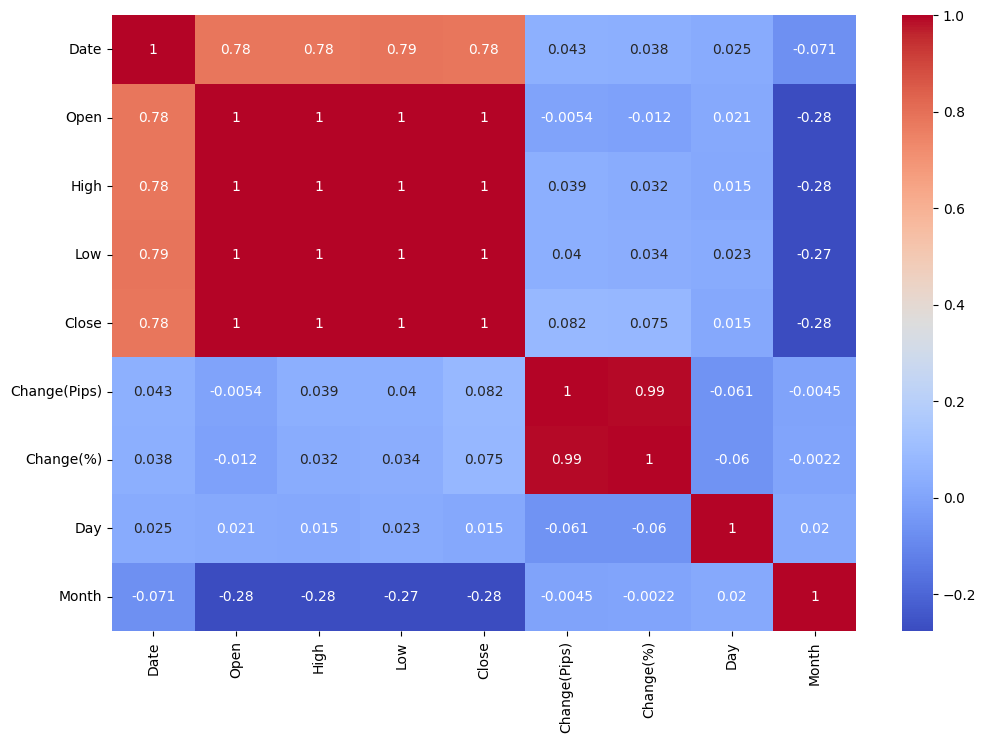

In [15]:
# Checking for multi-colinearity
corr2 = data.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr2,annot=True,cmap='coolwarm')
plt.show()

#### Model Development

In [16]:
x = data[['Open','High','Low']]
y = data['Close']
print('x = ',x.shape)
print('y = ',y.shape)

x =  (731, 3)
y =  (731,)


In [17]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.3,random_state=100,shuffle=True)

In [18]:
print('X_train = ',x_train.shape)
print('Y_train = ',y_train.shape)

X_train =  (511, 3)
Y_train =  (511,)


In [19]:
lm = LinearRegression()

#### Linear Regression Base model

In [20]:
# Train a base linear regression model
lm.fit(x_train,y_train)

LinearRegression()

In [21]:
# Making Prediction
y_test_pred = lm.predict(x_test)

In [22]:
mse = mean_squared_error(y_test,y_test_pred)
r_score = r2_score(y_test, y_test_pred)
print('Mean Squared Error:', mse)
print('RMSE:', np.sqrt( mse))
print('r2_score:', r_score)

Mean Squared Error: 40.90760710905979
RMSE: 6.395905495632326
r2_score: 0.998816136297007


#### Applying Polynomial Features 

In [23]:
pf = PolynomialFeatures(degree=2, include_bias=False)
x_pf = pf.fit_transform(x)

In [24]:
x_train,x_test,y_train,y_test= train_test_split(x_pf,y,test_size=0.3,random_state=100,shuffle=True)

In [25]:
print('X_train = ',x_train.shape)
print('Y_train = ',y_train.shape)

X_train =  (511, 9)
Y_train =  (511,)


In [26]:
# Train the model
lm_poly = LinearRegression()
lm_poly.fit(x_train,y_train)

LinearRegression()

In [27]:
# Make Prediction
y_test_pred = lm_poly.predict(x_test)

In [28]:
mse_poly = mean_squared_error(y_test,y_test_pred)
r_score_poly = r2_score(y_test, y_test_pred)
print('Mean Squared Error:', mse_poly)
print('RMSE:', np.sqrt( mse_poly))
print('r2_score:', r_score_poly)

Mean Squared Error: 38.949377907515775
RMSE: 6.240943671234005
r2_score: 0.9988728073329751


 #### Applying Standard Scaler to the polynomial features x_train and x_test data set, and boxcox transformation to the y_train and y_test data set

In [29]:
scaler = StandardScaler()
X_pf_scaled = scaler.fit_transform(x_train)

In [30]:
bc = boxcox(y_train)
Y_train_bc = bc[0]
lam2 = bc[1]

In [31]:
# Training the model
lm_transform = LinearRegression()

lm_transform.fit(X_pf_scaled,Y_train_bc)

LinearRegression()

In [32]:
# making prediction
x_test_scaled = scaler.fit_transform(x_test)
y_bc_pred = lm_transform.predict(x_test_scaled)

In [33]:
# inverse y_bc_pred transformation
y_pred_trans = inv_boxcox(y_bc_pred,lam2)

In [34]:
mse_bc = mean_squared_error(y_test,y_pred_trans)
r_score_bc = r2_score(y_test, y_pred_trans)
print('Mean Squared Error:', mse_bc)
print('RMSE:', np.sqrt( mse_bc))
print('r2_score:', r_score_bc)

Mean Squared Error: 344.1850965100626
RMSE: 18.552226187443452
r2_score: 0.9900393038932076


#### Carrying out Lasso and Ridge Regularization, using alphas of 0.01 and 0.1 respectively

In [35]:
# using alfar of 0.01
La = Lasso(alpha=0.01)
La.fit(x_train,y_train)

Lasso(alpha=0.01)

In [36]:
La_y_pred= La.predict(x_test)

In [37]:
mse_la = mean_squared_error(y_test,La_y_pred)
r_score_la = r2_score(y_test, La_y_pred)
print('Mean Squared Error:', mse_la)
print('RMSE:', np.sqrt( mse_la))
print('r2_score:', r_score_la)

Mean Squared Error: 39.78918785833974
RMSE: 6.30786714019404
r2_score: 0.9988485032832286


In [38]:
# Training the Lasso Regression model using alpha = 0.1
la_model = Lasso(alpha= 0.1)
la_model.fit(X_pf_scaled, Y_train_bc)

Lasso(alpha=0.1)

In [39]:
# Making Prediction
la_model_pred = la_model.predict(x_test)

In [40]:
mse_la_model = mean_squared_error(y_test,la_model_pred)
r_score_la_model = r2_score(y_test, la_model_pred)
print('Mean Squared Error:', mse_la_model)
print('RMSE:', np.sqrt( mse_la_model))
print('r2_score:', r_score_la_model)

Mean Squared Error: 3888264.0211519785
RMSE: 1971.8681551138195
r2_score: -111.52612820943972


In [41]:
# Training the Ridge Regression model
Rg = Ridge(alpha=0.01)
Rg.fit(x_train,y_train)

Ridge(alpha=0.01)

In [42]:
# Using Ridge Model to Make Predictions 
Rg_y_pred = Rg.predict(x_test)

In [43]:
mse_Rg = mean_squared_error(y_test,Rg_y_pred)
r_score_Rg = r2_score(y_test, Rg_y_pred)
print('Mean Squared Error:', mse_Rg)
print('RMSE :', np.sqrt(mse_Rg))
print('r2_score:', r_score_Rg)

Mean Squared Error: 38.94933658698614
RMSE : 6.240940360793887
r2_score: 0.9988728085287888


In [44]:
# Training the model using alpha of 0.1
Rg_model = Ridge(alpha= 0.1)
Rg_model.fit(X_pf_scaled, Y_train_bc)

Ridge(alpha=0.1)

In [45]:
# Making Prediction
Rg_model_pred = Rg_model.predict(x_test)

In [46]:
mse_Rg_model = mean_squared_error(y_test,Rg_model_pred)
r_score_Rg_model = r2_score(y_test, Rg_model_pred)
print('Mean Squared Error:', mse_Rg_model)
print('RMSR:', np.sqrt( mse_Rg_model))
print('r2_score:', r_score_Rg_model)

Mean Squared Error: 3888264.4350433955
RMSR: 1971.8682600628763
r2_score: -111.52614018743259


Once you have selected a data set, you will produce the deliverables listed below and submit them to one of your peers for review. Treat this exercise as an opportunity to produce analysis that are ready to highlight your analytical skills for a senior audience, for example, the Chief Data Officer, or the Head of Analytics at your company.
Sections required in your report:

*   Main objective of the analysis that specifies whether your model will be focused on prediction or interpretation.
*   Brief description of the data set you chose and a summary of its attributes.
*   Brief summary of data exploration and actions taken for data cleaning and feature engineering.
*   Summary of training at least three linear regression models which should be variations that cover using a simple  linear regression as a baseline, adding polynomial effects, and using a regularization regression. Preferably, all use the same training and test splits, or the same cross-validation method.
*  A paragraph explaining which of your regressions you recommend as a final model that best fits your needs in terms of accuracy and explainability.
*  Summary Key Findings and Insights, which walks your reader through the main drivers of your model and insights from your data derived from your linear regression model.
*  Suggestions for next steps in analyzing this data, which may include suggesting revisiting this model adding specific data features to achieve a better explanation or a better prediction.


# 1. About the Data


### Gold-United State dolar (XAUUSD) Price Prediction.

**DISCRIPTION:**

XAUUSD dataset is a historical forex pair dataset which shows the open and close price, as well as the highest and lowest price of gold metal to the United States dollar. 
The attributes found in this dataset are:
1)  DATE: The day the data was recorded
2)  OPEN: The opening / starting price of the day.
3)  CLOSE: The closing price of the day.
4)  HIGH: The highest price of the day.
5)  LOW: The lowest price of the day.
6)  CHANGE (PIP): The different between the closing price of the different days.
7)  CHANGE (%): The difference between the closing price of the different days in percentage.

#### Data Cleaning and Exploration

DATA CLEANING:
Null values as  well as duplicate values where checked for. The data set contains no null values and duplicate values.

DATA EXPLORATION:
Feature engineering was carried out, converting date to date_time format. Also, Statistical analysis aa well as features selection is carried out in order to get the best features to be used in training the model. In the features selection stage, multilinearity and collinearity, together with the P1-value of each features, are used for the features selection. 

* The code for this stage is found above

# 2. Objectives


* Create different linear Regression models starting with a base linear model, applying polynomial features and training another model, applying regularization and training another model.

* Finding the best model for prediction purposes.

The code for these objectives are found above.

# 3. Linear Regression Models


* Linear Regression model as the base model. This model is trained using the splitted dataset (train and test) in its cleaned form, after data exploration. 

* Polynomial Applied Linear Model. This model is trained after applying polynomial features second degree to the data set, before splitting into train and test subsets

- Transformation linear Regression Models.
This model is created using the polynomial subsets which is scaled and transformed using boxcox transformation 

* Lasso Regularization and Ridge Regularization models were created using alpha values of 0.01 and 0.1 on the polynomial transformed subsets.

The code to this models are found above.

In [47]:
model_data = pd.DataFrame({'Model':['Base Model','Polynomial Model','Transformed_Model','Lasso Model(0.01)','Lasso Model(0.1)','Ridge Model(0.01)','Ridge Model(0.1)'],
                           'Root Mean Squared Error':[np.sqrt(mse),np.sqrt(mse_poly),np.sqrt(mse_bc),np.sqrt( mse_la),np.sqrt( mse_la_model), np.sqrt(mse_Rg),np.sqrt( mse_Rg_model)],
                           'r2_score':[r_score,r_score_poly,r_score_bc,r_score_la,r_score_la_model,r_score_Rg,r_score_Rg_model]})
model_data

,Model,Root Mean Squared Error,r2_score
0,Base Model,6.395905,0.998816
1,Polynomial Model,6.240944,0.998873
2,Transformed_Model,18.552226,0.990039
3,Lasso Model(0.01),6.307867,0.998849
4,Lasso Model(0.1),1971.868155,-111.526128
5,Ridge Model(0.01),6.240940,0.998873
6,Ridge Model(0.1),1971.868260,-111.526140


RECOMMENDED MODEL:
From the 7 different trained regression models, the polynomial transformed model and the ridge regularization model with alpha value of 0.01 showed the best predictive performance with both having the same root mean square and r2_score values respectfully. The r2_score of these models showed that they were able to explain upto 99% of the variance in the daily closing price of gold and their prediction may be off by an average value of 6.24 as seen from the root mean square error, suggesting their high predictability.

# 4. Insights and key findings


The lasso model with alpha value of 0.1 and the Ridge model with alpha value of 0.1, have the worse prediction power. looking at the r2_score of both models, they could not explain much of the variability of the target variable (the daily closing price of gold). This is confirmed by the very high root mean square values of both models which suggest that the models predictability deviates greatly from the actual values.

Every other models were able to explain up to 99% of the variance in the daily closing price of gold as seen from the r2_score, and their predictions may by off by an average score or value that is shown by the root mean square value of the models.

# 5. Next Steps


Deploying the recommended models with a constant monitoring as new data are been added to the data set.

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>
